<a href="https://colab.research.google.com/github/Shadabur-Rahaman/30-days-ml-projects/blob/main/Day_23_Anomaly_Detection_Cleaned/notebooks/Day_23_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anomaly Detection in Transaction Data
# Goal: Detect fraudulent transactions using Isolation Forest
# Dataset: Credit Card Fraud Detection (Kaggle)
# Techniques: Isolation Forest, PCA Visualization, Threshold Tuning

In [ ]:
# %% [code]
### Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# %% [code]
### Step 2: Load and Inspect Data
df = pd.read_csv('creditcard.csv')  # Ensure dataset is in your directory
print(df.info())
print("\nClass Distribution:\n", df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [4]:
# %% [code]
### Step 3: Preprocessing
# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
# Add after Step 3: Preprocessing
# Clean NaN values
print("NaN values before cleaning:")
print(X.isna().sum())

# Simple imputation (fill with mean)
X = X.fillna(X.mean())

# Or drop rows with NaN
# X = X.dropna()
# y = y[X.index]  # Align target

print("\nNaN values after cleaning:", X.isna().sum().sum())

NaN values before cleaning:
V1               0
V2               0
V3               0
V4               0
V5               1
V6               1
V7               1
V8               1
V9               1
V10              1
V11              1
V12              1
V13              1
V14              1
V15              1
V16              1
V17              1
V18              1
V19              1
V20              1
V21              1
V22              1
V23              1
V24              1
V25              1
V26              1
V27              1
V28              1
scaled_amount    1
scaled_time      0
dtype: int64

NaN values after cleaning: 0


In [15]:
# %% [code]
### Step 4: Train Isolation Forest Model
model = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # Approx fraud rate
    random_state=42,
    verbose=1
)
model.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
predictions = model.predict(X)
df['anomaly_score'] = model.decision_function(X)
df['predicted_anomaly'] = [1 if x == -1 else 0 for x in predictions]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


NaN values in y: 1
NaN values in predictions: 0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     17836
         1.0       0.33      0.73      0.45        81

    accuracy                           0.99     17917
   macro avg       0.66      0.86      0.72     17917
weighted avg       1.00      0.99      0.99     17917



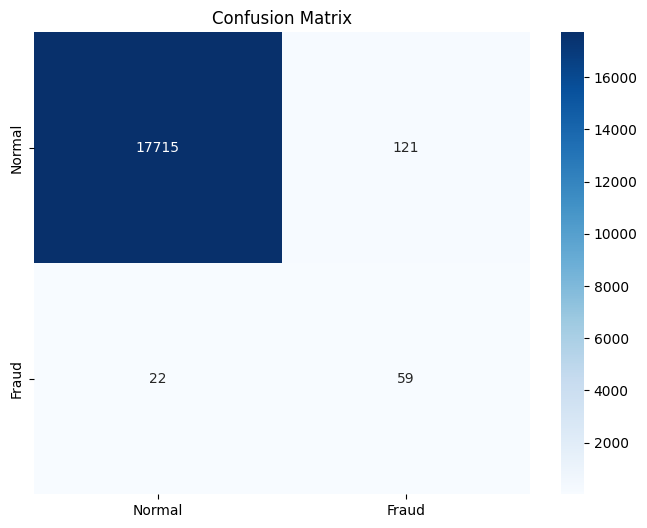

In [16]:
### Step 5: Evaluate Performance
# Handle NaN values
print("NaN values in y:", y.isna().sum())
print("NaN values in predictions:", df['predicted_anomaly'].isna().sum())

# Remove NaN values if present
valid_mask = y.notna() & df['predicted_anomaly'].notna()
y_clean = y[valid_mask]
preds_clean = df['predicted_anomaly'][valid_mask]

print("\nClassification Report:")
print(classification_report(y_clean, preds_clean))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_clean, preds_clean),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

NaN values in X before cleaning: 0


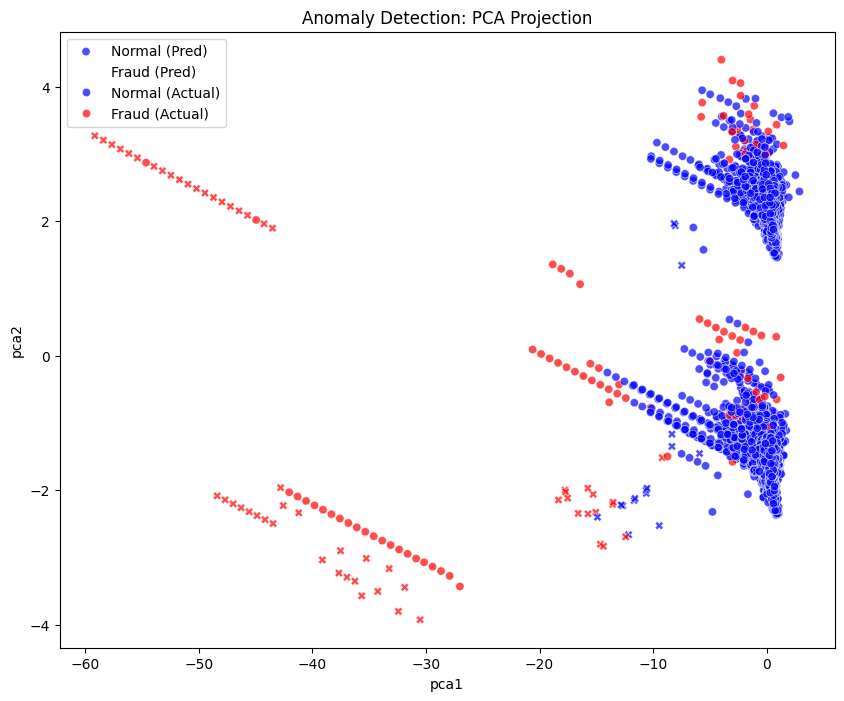

In [17]:
### Step 6: Visualize Anomalies
# Clean NaN values from features
print("NaN values in X before cleaning:", X.isna().sum().sum())
X_clean = X.dropna()

# Get corresponding clean indices
clean_idx = X_clean.index

# Apply PCA only to clean data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

# Update PCA columns only for clean rows
df.loc[clean_idx, 'pca1'] = X_pca[:, 0]
df.loc[clean_idx, 'pca2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='predicted_anomaly',
    style='Class',
    palette={0: 'blue', 1: 'red'},
    data=df.dropna(subset=['pca1', 'pca2']),  # Only plot rows with PCA values
    alpha=0.7
)
plt.title('Anomaly Detection: PCA Projection')
plt.legend(labels=['Normal (Pred)', 'Fraud (Pred)', 'Normal (Actual)', 'Fraud (Actual)'])
plt.savefig('pca_anomalies.png', dpi=300)
plt.show()

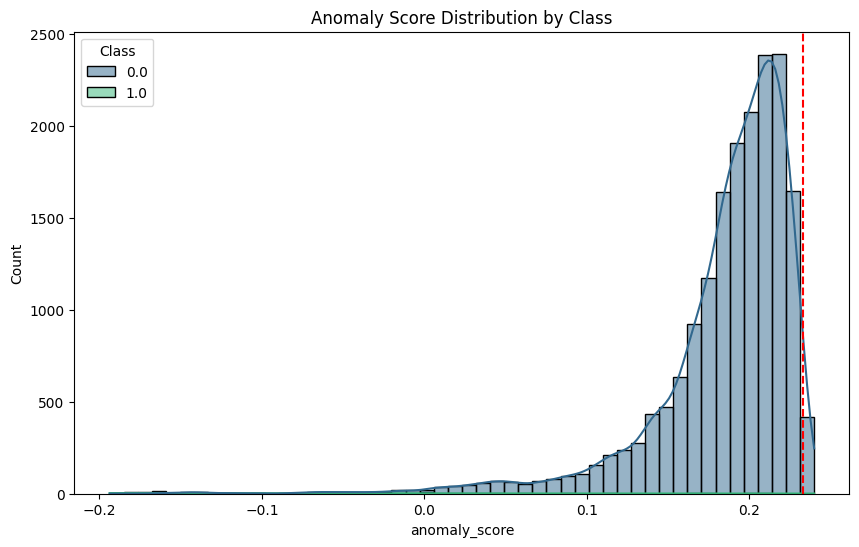

In [18]:
# %% [code]
### Step 7: Anomaly Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='anomaly_score',
    hue='Class',
    kde=True,
    bins=50,
    palette='viridis'
)
plt.axvline(x=np.percentile(df['anomaly_score'], 99), color='red', linestyle='--')  # Top 1% scores
plt.title('Anomaly Score Distribution by Class')
plt.savefig('score_distribution.png', dpi=300)  # Save image
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


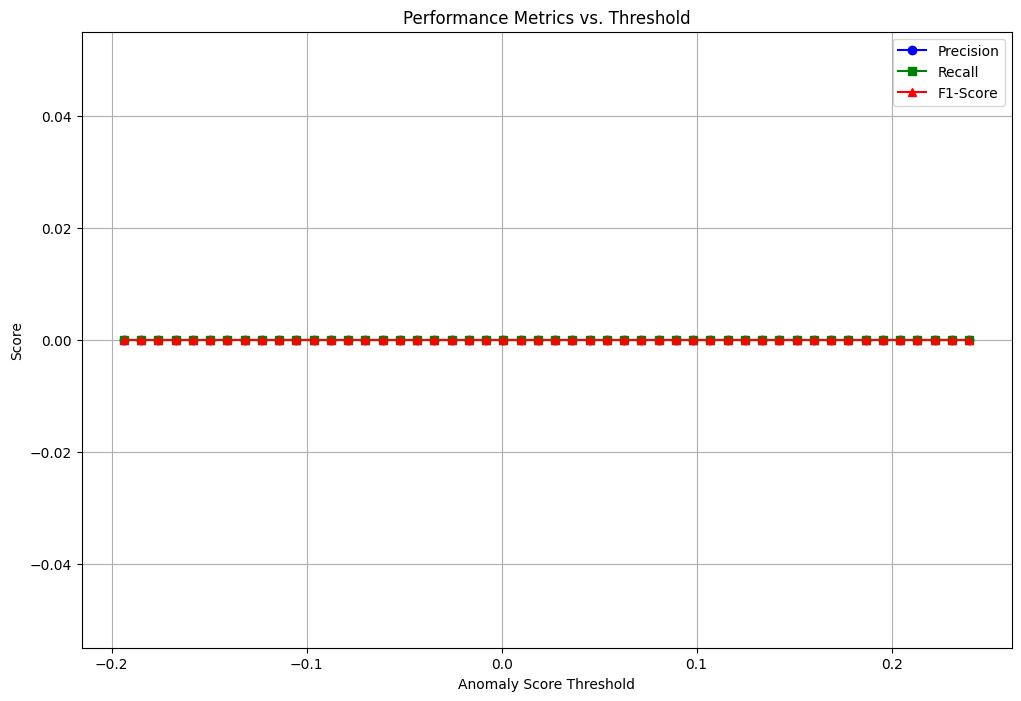

In [20]:
### Step 8: Threshold Analysis (Optional)
# Create clean version of y and anomaly_score
valid_mask = y.notna() & df['anomaly_score'].notna()
y_clean = y[valid_mask]
scores_clean = df['anomaly_score'][valid_mask]

thresholds = np.linspace(scores_clean.min(), scores_clean.max(), 50)
precision = []
recall = []
f1 = []

for thresh in thresholds:
    predicted = (scores_clean < thresh).astype(int)
    report = classification_report(y_clean, predicted, output_dict=True)

    # Handle case where '1' might not exist in report
    if '1' in report:
        precision.append(report['1']['precision'])
        recall.append(report['1']['recall'])
        f1.append(report['1']['f1-score'])
    else:
        precision.append(0)
        recall.append(0)
        f1.append(0)

# Create plot
plt.figure(figsize=(12, 8))
plt.plot(thresholds, precision, 'b-', label='Precision', marker='o')
plt.plot(thresholds, recall, 'g-', label='Recall', marker='s')
plt.plot(thresholds, f1, 'r-', label='F1-Score', marker='^')
plt.xlabel('Anomaly Score Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.savefig('precision_threshold.png', dpi=300)
plt.show()